In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [44]:
# load data
df = pd.DataFrame(sns.load_dataset('titanic'))
df = df.drop(columns=['sibsp', 'parch', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

# check na values then drop : print(df.isna().sum())
df = df.dropna(subset=['age'])
#print(df.groupby(['embarked', 'pclass']).size())

# encode categorical variables
df['sex'] = df['sex'].map({'male':1, 'female':0})
df = pd.get_dummies(df, columns=['pclass', 'embarked'], drop_first=True) #one-hot encoding
for col in df.columns:  #change boolean to integer (binarize it)
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
print(df.head())

   survived  sex   age     fare  pclass_2  pclass_3  embarked_Q  embarked_S
0         0    1  22.0   7.2500         0         1           0           1
1         1    0  38.0  71.2833         0         0           0           0
2         1    0  26.0   7.9250         0         1           0           1
3         1    0  35.0  53.1000         0         0           0           1
4         0    1  35.0   8.0500         0         1           0           1


In [45]:
x = df.drop(columns=['survived'])
# scaler = StandardScaler()
# x = scaler.fit_transform(x)  #standardize X 
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=70, test_size=30,
    random_state = 123
)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[:5])

     sex   age      fare  pclass_2  pclass_3  embarked_Q  embarked_S
342    1  28.0   13.0000         1         0           0           1
843    1  34.5    6.4375         0         1           0           0
708    0  22.0  151.5500         0         0           0           1
227    1  20.5    7.2500         0         1           0           1
541    0   9.0   31.2750         0         1           0           1


In [51]:
#sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))
#prediction 
def pred(x,w):
    return sigmoid(x @ w)
#binary cross entropy
def binary_cross_entropy(y_true, y_pred_prob):
    eps = 1e-15  # to prevent log(0)
    y_pred_prob = np.clip(y_pred_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
#get loss and accuracy 
def evaluate(x_test, y_test, w):
    y_pred_prob = sigmoid(x_test @ w)
    y_pred = (y_pred_prob >= 0.5).astype(int)  # binary predictions
    loss =  binary_cross_entropy(y_test, y_pred_prob)
    #loss = np.mean((y_test - y_pred_prob) ** 2) / 2  #Can use MSE but not recommended
    accuracy = np.mean(y_pred == y_test)
    return loss, accuracy

In [77]:
#initialize
x, y = x_test, y_test
r,c = x.shape[0], x.shape[1]
iters = 30000
alpha = 0.001 #learning rate
w = np.ones(c) #initialize weights as 1 or you can try zero : np.zeros(c)
loss_hist = np.zeros((0,3))

In [78]:
for k in range(iters):
    y_pred = pred(x, w)              # prediction values

    # gradient descent update using the error
    gradient = x.T @ (y_pred - y) #derivatibe of MSE 
    w -= alpha * gradient / r  # or w -= alpha * grad, depending on sign convention

    # for every 100 iterations, compute loss
    if k % 100 == 0:
        loss, score = evaluate(x_test, y_test, w)
        loss_hist = np.vstack((loss_hist, np.array([k, loss, score])))
        print("iter = %d loss = %f" % (k, loss))

print('initial loss : %f, accuracy: %f' % (loss_hist[0,1], loss_hist[0,2]))
print('final loss : %f, accuracy: %f' % (loss_hist[-1,1], loss_hist[-1,2]))

iter = 0 loss = 15.834665
iter = 100 loss = 1.288215
iter = 200 loss = 0.969176
iter = 300 loss = 0.957946
iter = 400 loss = 0.948431
iter = 500 loss = 0.939063
iter = 600 loss = 0.929843
iter = 700 loss = 0.920770
iter = 800 loss = 0.911842
iter = 900 loss = 0.903061
iter = 1000 loss = 0.894424
iter = 1100 loss = 0.885931
iter = 1200 loss = 0.877582
iter = 1300 loss = 0.869375
iter = 1400 loss = 0.861309
iter = 1500 loss = 0.853383
iter = 1600 loss = 0.845597
iter = 1700 loss = 0.837948
iter = 1800 loss = 0.830436
iter = 1900 loss = 0.823059
iter = 2000 loss = 0.815816
iter = 2100 loss = 0.808705
iter = 2200 loss = 0.801726
iter = 2300 loss = 0.794876
iter = 2400 loss = 0.788153
iter = 2500 loss = 0.781557
iter = 2600 loss = 0.775086
iter = 2700 loss = 0.768737
iter = 2800 loss = 0.762509
iter = 2900 loss = 0.756401
iter = 3000 loss = 0.750411
iter = 3100 loss = 0.744536
iter = 3200 loss = 0.738776
iter = 3300 loss = 0.733127
iter = 3400 loss = 0.727589
iter = 3500 loss = 0.722160
ite

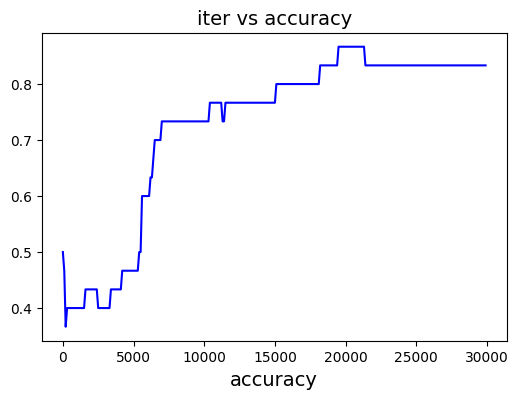

In [80]:
plt.figure(figsize=(6,4))
plt.plot(loss_hist[:,0], loss_hist[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.xlabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

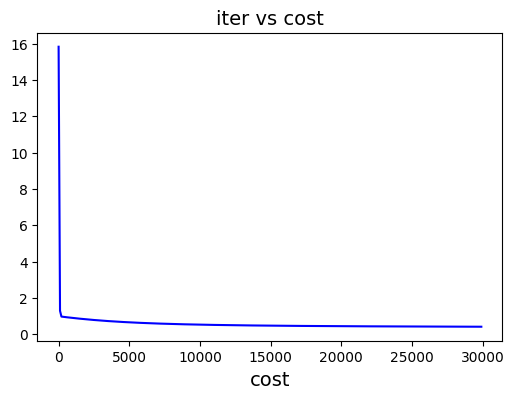

In [81]:
plt.figure(figsize=(6,4))
plt.plot(loss_hist[:,0], loss_hist[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.xlabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()